# Machine Learning Model Building Pipeline: Model Building


## Predicting Rent Price of Houses

This is the notebook for step 3: Model Building

Final Notebook for the Machine Learning Pipeline. We will try out 4 different models:

1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. XgBoost Regressor

and for each of the four models we will check the MAE, RMSE, along with R2_Score. And choose the model that give us best evalution metrics

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore annoying warning (from sklearn and seaborn)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.shape

(229505, 26)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    data.drop('price',axis=1),
                                    data['price'],
                                    test_size=0.25,
                                    random_state=0)

***Data Split 1: all of our final dataset, no scaling***

In [4]:
y = data['price']
X = data.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

***Data Split 2: all of our final dataset, with scaling***

In [5]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

## Linear Regression

From our EDA, we can see that most features do not have a linear relationship with our labels, yet we will try linear regression, and use the result as a reference.

***Model Training***

In [6]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Predictions***

In [7]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)

***Evaluation***

Linear Regression Performance:

all features, No scaling:
MAE: 0.265674021891983
RMSE: 0.44667010167669347
R2_Score:  0.14585399138879873

all features, with scaling:
MAE: 0.2654213174309819
RMSE: 0.44661538447407306
R2_Score:  0.14606324478377508


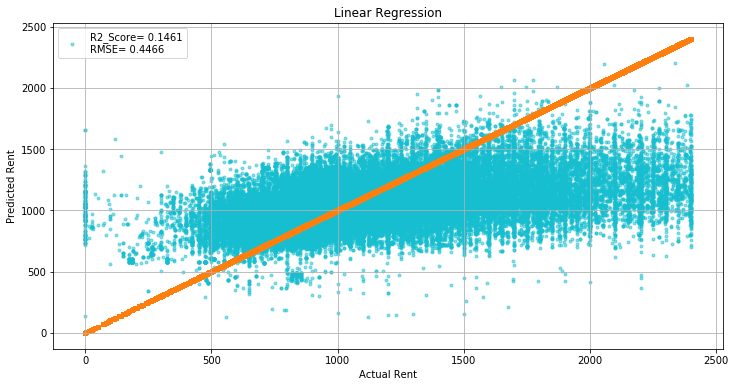

In [8]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y2_test, lm2_pred), 
                np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
           ],
           loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()

The orange line in the graph represents the actual rents. And the cyan circles plotted against actual rents on the x-axis and predicted rent on the y-axis, are the predicted rents.

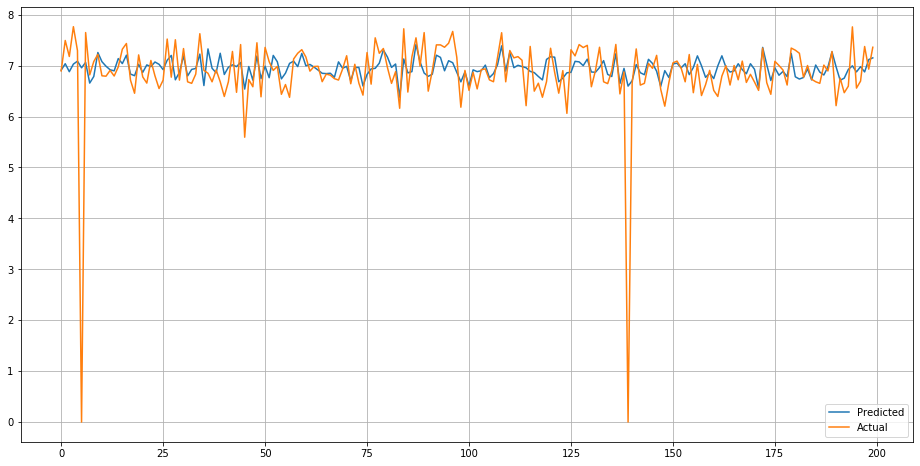

In [9]:
test = pd.DataFrame({'Predicted':lm1_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:200])
plt.legend(['Predicted','Actual'])
plt.grid()

Linear Model worked terribly, which was expected as there were no linear relationship among the features. Feature scaling has a small positive effect on LR's prediction performance.

## Random Forest

Let's first try random forest with our data splits (with and without feature selection). Scaling the features should not affect this algorithm's performance, still we are going to test it. later we will try to improve its performance.

***Model Training***

In [10]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf2 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf2.fit(X2_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

***Predictions***

In [11]:
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X2_test)

***Evaluation***

Random Forest Performance:

all features, No scaling:
MAE: 0.061713188084745456
RMSE: 0.18956777786367815
R2_Score:  0.8461535826102313

all features, with scaling:
MAE: 0.11550715508650682
RMSE: 0.297825903078616
R2_Score:  0.6202626778611636


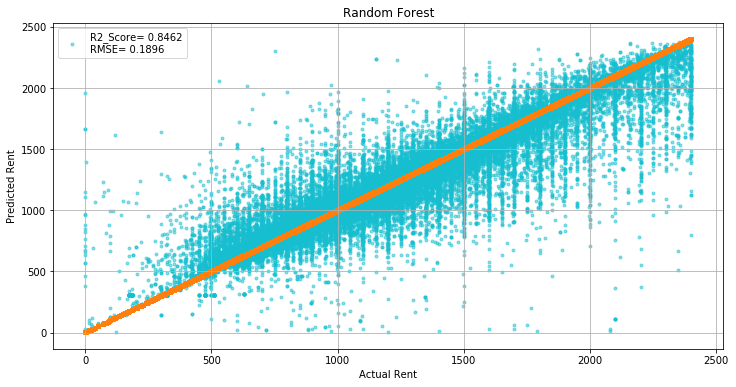

In [12]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rf2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, rf1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
           ],
           loc='best')
plt.title('Random Forest')
plt.grid()
plt.show()

Features without scaling gave a better result on random forest than with scaled features

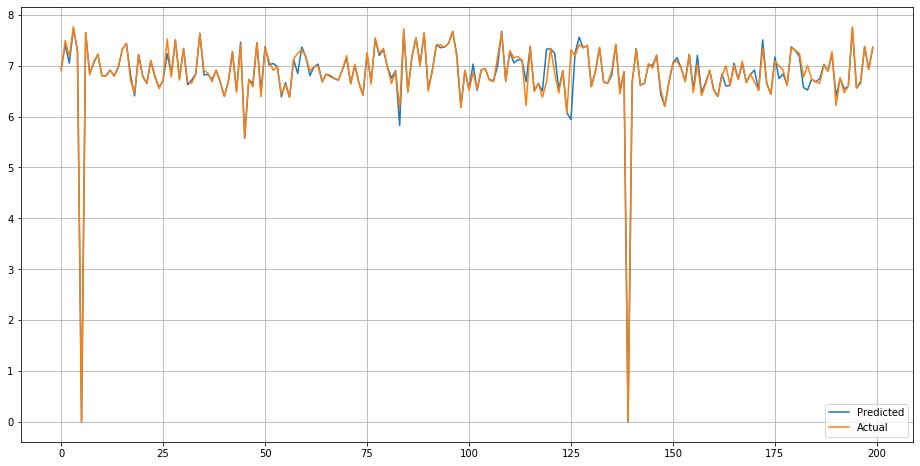

In [13]:
test = pd.DataFrame({'Predicted':rf1_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:200])
plt.legend(['Predicted','Actual'])
plt.grid()


***Optimization***

We will use grid search in order to obtain good parameters for our RF regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimiz are:

- n-estimators
- min_samples_leaf
- max_features
- bootstrap



In [14]:
rf_param_grid = {'max_features': ['sqrt', 'auto'],
                 'min_samples_split': [4, 6],
              'min_samples_leaf': [3, 5],
              'n_estimators': [100, 200],
             'bootstrap': [False, True]}

In [15]:
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

In [16]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False, True],


In [17]:
rf_grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [18]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [19]:
rf_grid_predictions = rf_grid.predict(X_test)

MAE: 0.06739516583053462
RMSE: 0.19651519459205988
R2_Score:  0.8346703979948062


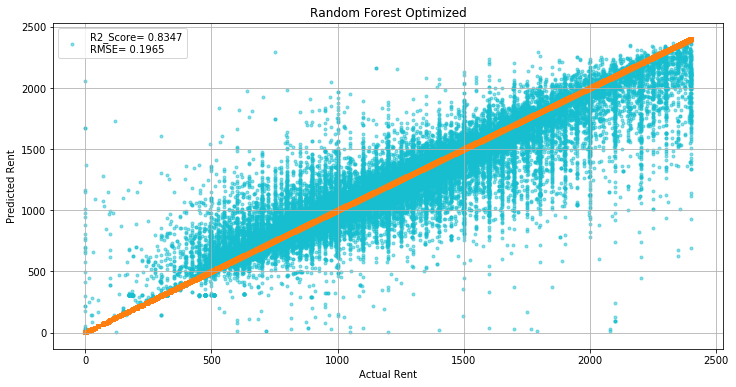

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf_grid_predictions), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, rf_grid_predictions), 
                np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
           ],
           loc='best')
plt.title('Random Forest Optimized')
plt.grid()
plt.show()

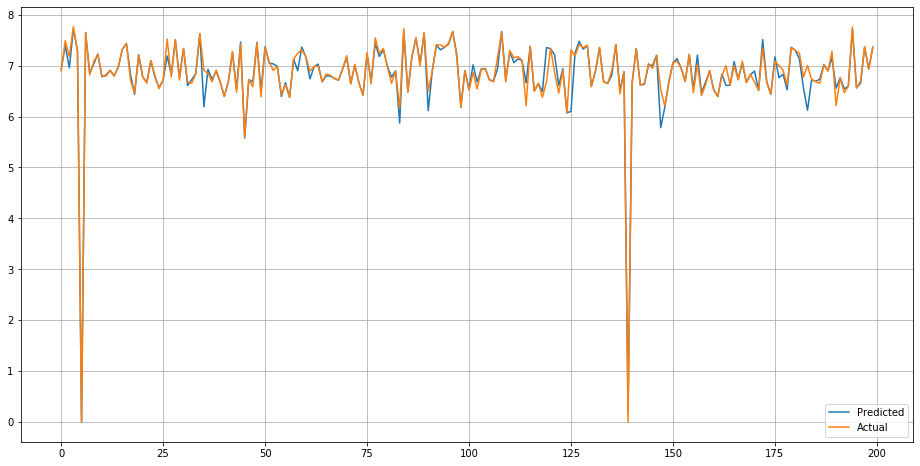

In [21]:
test = pd.DataFrame({'Predicted':rf_grid_predictions,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:200])
plt.legend(['Predicted','Actual'])
plt.grid()

We can see that the optimization process on RF regressor has not changed the performance in a noticebale manner, yet the slight change was actually to the worst, that is probably because our initial parameters were already very close to the optimum ones.

## Gradient Boosting

***Training***

In [22]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, 
                                 min_samples_leaf=1, max_depth=3, subsample=1.0, max_features= None, 
                                 random_state=101)

gbm1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=101, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

***Predictions***

In [23]:
gbm1_pred = gbm1.predict(X_test)

***Evaluation***

Gradiant Boosting Performance:

all features, No scaling:
MAE: 0.17574432274593074
RMSE: 0.3201917654191341
R2_Score:  0.5610867757022676


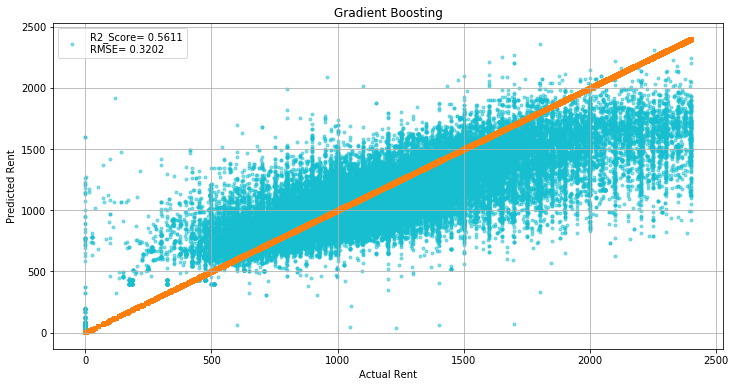

In [24]:
print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm1_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(gbm1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, gbm1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
           ],
           loc='best')
plt.title('Gradient Boosting')
plt.grid()
plt.show()

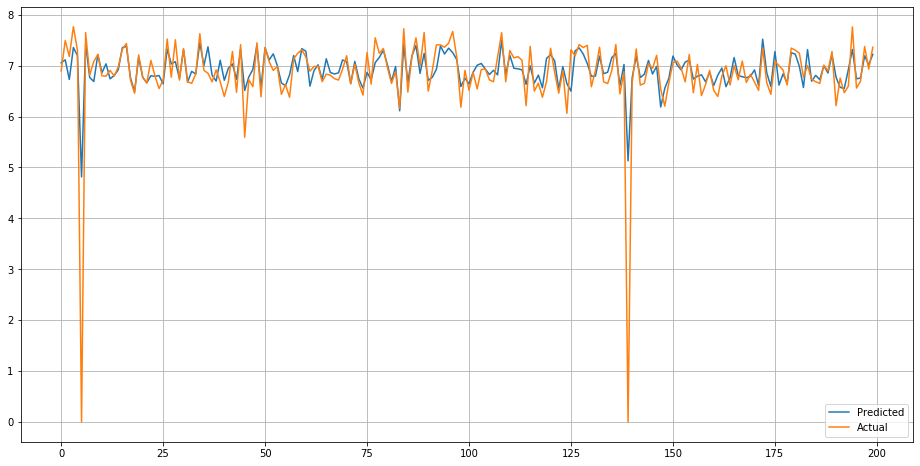

In [25]:
test = pd.DataFrame({'Predicted':gbm1_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:200])
plt.legend(['Predicted','Actual'])
plt.grid()

It is clear that Gradiant Boosting gave us a very poor performance, compared to Random Forest. So not opting for an optimization.

## XgBoost

***Model Training***

We will train the xgboost regressor with the default parameter values

In [26]:
xgb1 = XGBRegressor(learning_rate=0.1, n_estimators=100, 
                    min_samples_split=2, min_samples_leaf=1, 
                    max_depth=3, subsample=1.0, random_state=101)

xgb1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, min_samples_leaf=1, min_samples_split=2,
             missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1.0, tree_method=None, validate_parameters=False,
             verbosity=None)

***Predictions***

In [27]:
xgb1_pred = xgb1.predict(X_test)

***Evaluation***

XgBoost Performance:

all features, No scaling:
MAE: 0.17659367897844686
RMSE: 0.32530437497518294
R2_Score:  0.5469583222192218


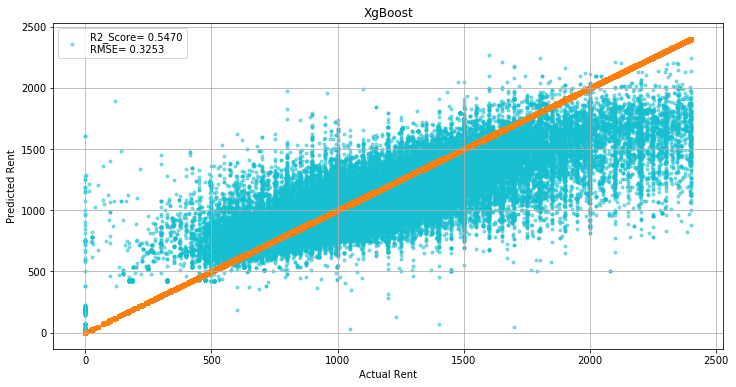

In [28]:
print('XgBoost Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, xgb1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, xgb1_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(xgb1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, xgb1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, xgb1_pred)))
           ],
           loc='best')
plt.title('XgBoost')
plt.grid()
plt.show()

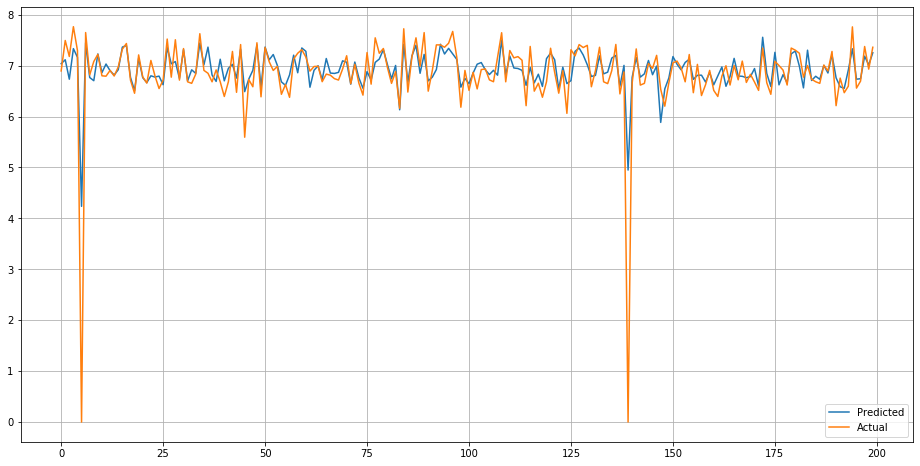

In [29]:
test = pd.DataFrame({'Predicted':xgb1_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:200])
plt.legend(['Predicted','Actual'])
plt.grid()

XgBoost also performed poorly. So will not be optimizing.

## Conclusion

In this project, we used house rent dataset to build a monthly rent predictor. 4 different learning regressors (Linear Regression, Random Forest, Gradiant Boosting, and XgBoost) were tested, and we have acheived the best prediction performance using Random Forest, followed by Gradiant Boosting, and then XgBoost, while Linear Regression, acheived the worst performance of the 4.

The best prediction performance was acheived using Random Forest regressor, using all features in the dataset, and resulted in the following metrics:

- Mean Absolute Error (MAE): 0.0591
- Root mean squared error (RMSE): 0.1717
- R-squared Score (R2_Score): 0.8746